In [9]:
import os
from pathlib import Path

# Load all models from ../models/text/
models_dir = Path("../models/text/")
model_files = list(models_dir.glob("*"))

print(f"Found {len(model_files)} model(s):")
for model_file in model_files:
    print(f"  - {model_file.name}")

# Load models into a dictionary
models = {}
for model_file in model_files:
    try:
        # Adjust loading method based on file type
        if model_file.suffix == ".pkl":
            import pickle
            with open(model_file, 'rb') as f:
                models[model_file.name] = pickle.load(f)
        elif model_file.suffix == ".joblib":
            import joblib
            models[model_file.name] = joblib.load(model_file)
        else:
            print(f"  Skipped {model_file.name} (unsupported format)")
    except Exception as e:
        print(f"  Error loading {model_file.name}: {e}")

print(f"\nSuccessfully loaded {len(models)} model(s)")

Found 2 model(s):
  - distilbert_iemocap_best.pt
  - distilbert_best.pt
  Skipped distilbert_iemocap_best.pt (unsupported format)
  Skipped distilbert_best.pt (unsupported format)

Successfully loaded 0 model(s)


<Figure size 1000x600 with 0 Axes>

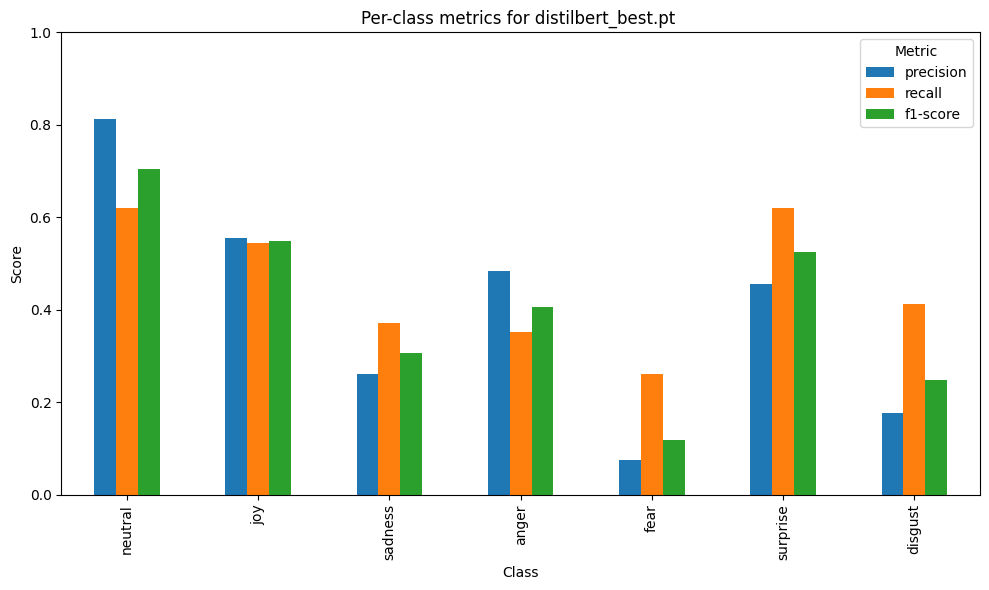

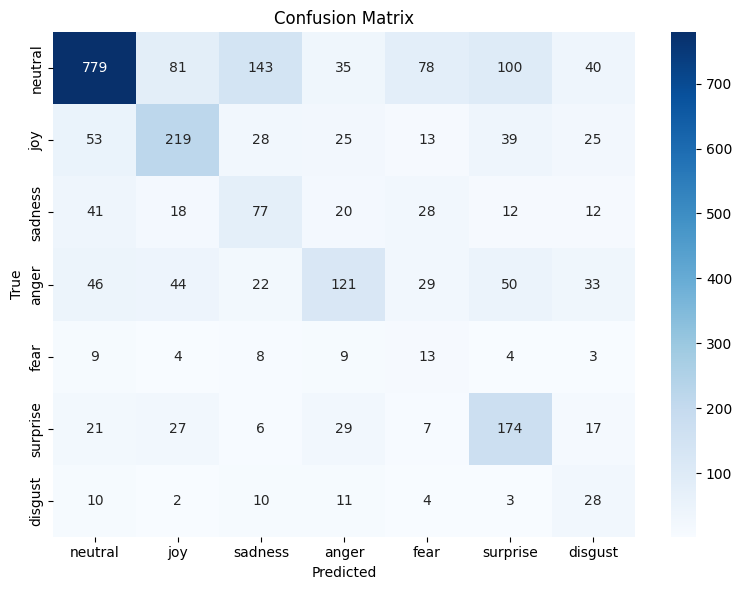

In [10]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path

import matplotlib.pyplot as plt

report_path = Path("../reports/text_eval_report.json")
with open(report_path, "r", encoding="utf-8") as f:
    report = json.load(f)

# prepare per-class metrics
cr = report["classification_report"]
skip_keys = {"accuracy", "macro avg", "weighted avg"}
classes = [k for k in cr.keys() if k not in skip_keys]
metrics = ["precision", "recall", "f1-score"]
df_metrics = pd.DataFrame({m: [cr[c][m] for c in classes] for m in metrics}, index=classes)

# plot per-class metrics
plt.figure(figsize=(10, 6))
df_metrics.plot(kind="bar", figsize=(10, 6))
plt.ylim(0, 1)
plt.title("Per-class metrics for distilbert_best.pt ")
plt.ylabel("Score")
plt.xlabel("Class")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

# plot confusion matrix
cm = np.array(report["confusion_matrix"])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

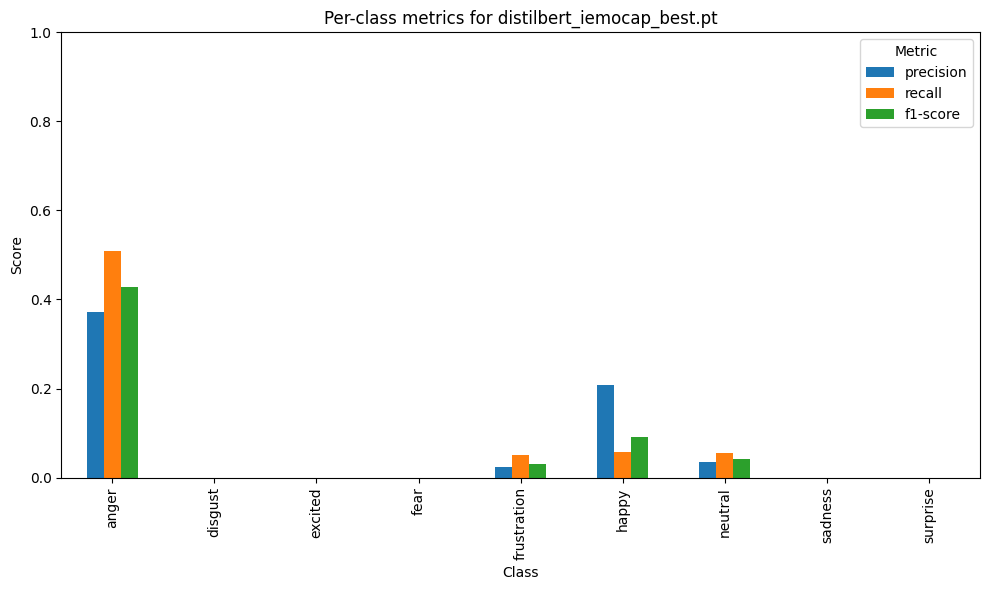

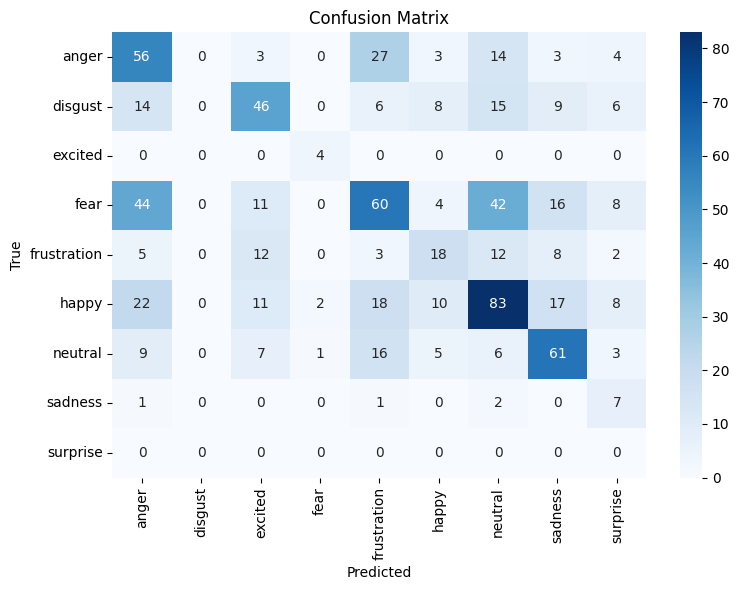

In [11]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path

import matplotlib.pyplot as plt

# load report (use existing `data` if present, otherwise read file)

report_path = Path("../reports/text_eval_report_iemocap.json")
with open(report_path, "r", encoding="utf-8") as f:
    report = json.load(f)

# prepare per-class metrics
cr = report["classification_report"]
skip_keys = {"accuracy", "macro avg", "weighted avg"}
classes = [k for k in cr.keys() if k not in skip_keys]
metrics = ["precision", "recall", "f1-score"]
df_metrics = pd.DataFrame({m: [cr[c][m] for c in classes] for m in metrics}, index=classes)

# plot per-class metrics
plt.figure(figsize=(10, 6))
df_metrics.plot(kind="bar", figsize=(10, 6))
plt.ylim(0, 1)
plt.title("Per-class metrics for distilbert_iemocap_best.pt")
plt.ylabel("Score")
plt.xlabel("Class")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

# plot confusion matrix
cm = np.array(report["confusion_matrix"])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

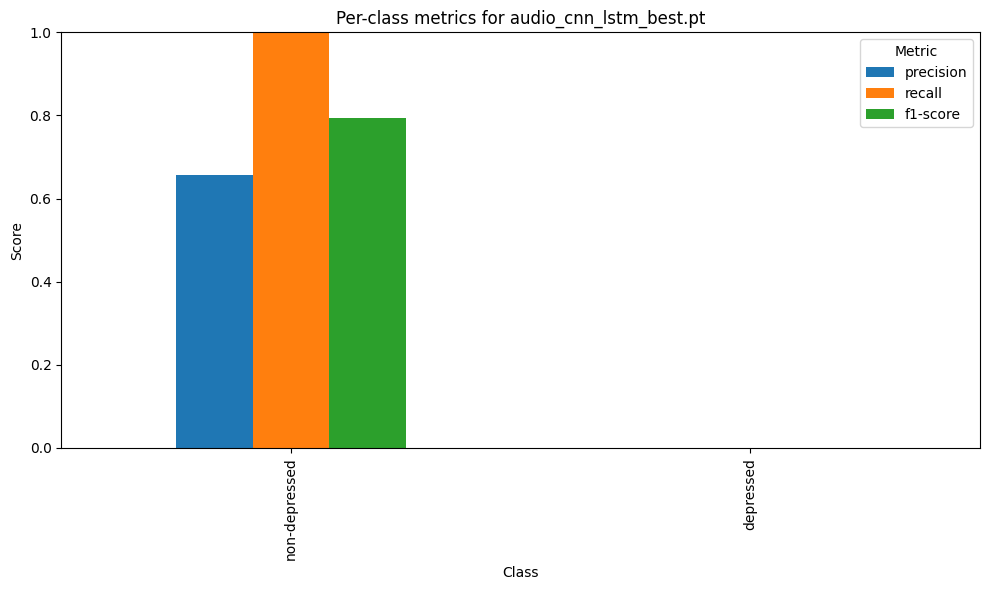

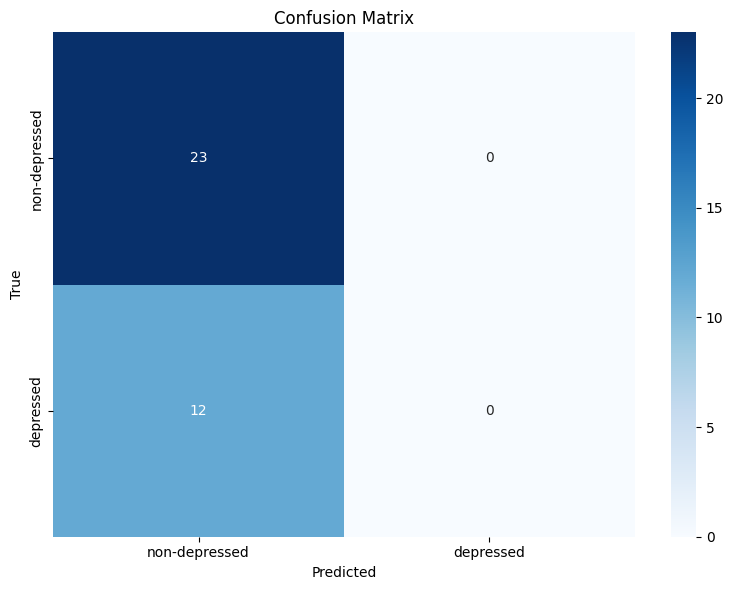

In [12]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path

import matplotlib.pyplot as plt

report_path = Path("../reports/audio_eval_report.json")
with open(report_path, "r", encoding="utf-8") as f:
    report = json.load(f)

# prepare per-class metrics
cr = report["classification_report"]
skip_keys = {"accuracy", "macro avg", "weighted avg"}
classes = [k for k in cr.keys() if k not in skip_keys]
metrics = ["precision", "recall", "f1-score"]
df_metrics = pd.DataFrame({m: [cr[c][m] for c in classes] for m in metrics}, index=classes)

# plot per-class metrics
plt.figure(figsize=(10, 6))
df_metrics.plot(kind="bar", figsize=(10, 6))
plt.ylim(0, 1)
plt.title("Per-class metrics for audio_cnn_lstm_best.pt")
plt.ylabel("Score")
plt.xlabel("Class")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

# plot confusion matrix
cm = np.array(report["confusion_matrix"])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()